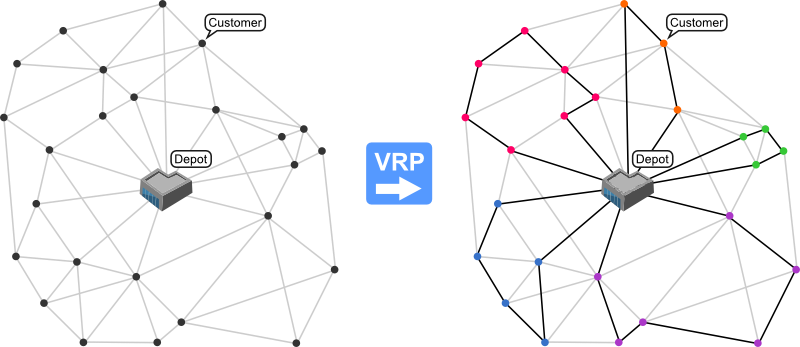

In [135]:
import gurobipy
import numpy as np
import matplotlib.pyplot as plt

[https://www.gurobi.com/](https://www.gurobi.com/) A really good optimization software used by companies like toyota, mercedes, basf etc.

## Generating problem instance...

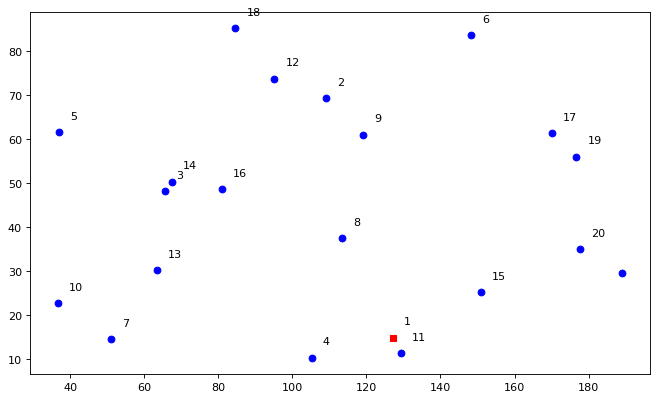

In [136]:
#Input Data
rnd = np.random
n = 20
xc = rnd.rand(n+1)*200
yc = rnd.rand(n+1)*100
N = [i for i in range(1,n+1)]
V = [0] + N
A = [(i,j) for i in V for j in V if i != j]
c = {(i,j): np.hypot(xc[i]-xc[j], yc[i]-yc[j]) for i,j in A}
Q = 50
q = {i: rnd.randint(1,10) for i in N}
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(xc[0], yc[0], c='r', marker='s')
plt.scatter(xc[1:], yc[1:], c = 'b')


for i, txt in enumerate(q):
    plt.annotate(txt, (xc[i]+3, yc[i]+3))



## Building the mathematical model

In [137]:
from gurobipy import Model, GRB, quicksum

In [138]:
mdl = Model("CVRP")
mdl.setParam('TimeLimit', 30)

Set parameter TimeLimit to value 30


In [139]:
x = mdl.addVars(A, vtype=GRB.BINARY)
u = mdl.addVars(N, vtype=GRB.CONTINUOUS)

In [140]:
mdl.modelSense = GRB.MINIMIZE

In [141]:
mdl.setObjective(quicksum(x[a]*c[a] for a in A))


min! $\sum_{i,j \in \mathcal{A}}  c_{i,j} \cdot d_{i,j}$ 

$\sum_{j \in \mathcal{V}, j \neq i}  x_{i,j} = 1 \;\; \forall i \in N $ 

$\sum_{j \in \mathcal{V}, j \neq i}  x_{i,j} = 1 \;\; \forall j \in N $ 

if $x_{i,j} \rightarrow u_i + q_j = u_j \,\,\, \forall  k \in \mathcal{K} ,t \in \mathcal{T}$

$q_i \leq u_i \leq Q \; \forall i \in N$

$x_{i,j} \in {0,1}$

In [142]:
mdl.addConstrs(quicksum(x[i,j] for j in V if j!=i)== 1 for i in N);
mdl.addConstrs(quicksum(x[i,j] for i in V if j!=i)== 1 for j in N);
mdl.addConstrs((x[i,j] == 1) >> (u[i] + q[i] == u[j])
              for i,j in A if i!=0 and j!=0);
mdl.addConstrs(u[i] >= q[i] for  i in N);
mdl.addConstrs(u[i] <= Q for i in N);

## Perform Solution procedure with gurobi

In [143]:
mdl.optimize()

Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (win64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 80 rows, 440 columns and 840 nonzeros
Model fingerprint: 0xfeffb183
Model has 380 general constraints
Variable types: 20 continuous, 420 integer (420 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e+00, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+01]
  GenCon rhs range [1e+00, 8e+00]
  GenCon coe range [1e+00, 1e+00]
Presolve added 730 rows and 100 columns
Presolve time: 0.08s
Presolved: 810 rows, 540 columns, 5605 nonzeros
Variable types: 120 continuous, 420 integer (420 binary)
Found heuristic solution: objective 2360.5032046

Root relaxation: objective 4.339224e+02, 104 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     

In [144]:
active_arcs = [a for a in A if x[a].x > 0.99]

In [145]:
def findEdgeByStartingNode(Node, li):
    for e in li:
        if(e[0] == Node):
            return e

In [146]:


def GetRouteRemoveEdgesFromLi(startingEdge, li):
    x = startingEdge
    tour = []
    tour.append(startingEdge)
    
    while(True):
        x = findEdgeByStartingNode(x[1], li)
        tour.append(x)
        
        if(x[1] == 0):
            break
            
        li.pop(li.index(x))
    
    return tour

routes = []

for i in range(0,2):
    routes.append(GetRouteRemoveEdgesFromLi(active_arcs[i],active_arcs))
    #we get error message when amoutn of routes is less than 3
    
active_arcs = [a for a in A if x[a].x > 0.99]

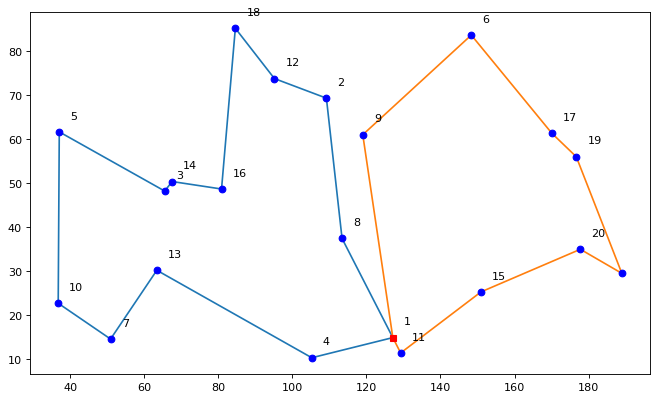

In [147]:
color = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan']

plt.figure(figsize=(10, 6), dpi=80) 
for idx, route in enumerate(routes):
    for i,j in route:
        plt.plot([xc[i], xc[j]], [yc[i], yc[j]], c=f'{color[idx]}', zorder=0)
  
plt.plot(xc[0], yc[0], c='r', marker='s')
plt.scatter(xc[1:], yc[1:], c='b')

for i, txt in enumerate(q):
    plt.annotate(txt, (xc[i]+3, yc[i]+3))

# code graveyard


plt.figure(figsize=(10, 6), dpi=80) 
for i,j in active_arcs:
    plt.plot([xc[i], xc[j]], [yc[i], yc[j]], c='b', zorder=0)
  
plt.plot(xc[0], yc[0], c='r', marker='s')
plt.scatter(xc[1:], yc[1:], c='b')

for i, txt in enumerate(q):
    plt.annotate(txt, (xc[i]+3, yc[i]+3))